In [1]:
import pandas as pd
from numpy import log1p
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# df = pd.read_csv('https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/concrete_Data.csv')

In [2]:
df = pd.read_csv('./concrete_data.csv')
features = df.columns[:-1].tolist()
target = 'strength'
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [3]:
df = df[df['water'] < 240]
df = df[df['superplastic'] < 30]
df = df[df['fineagg'] < 960]
df = df[df['age'] < 300]
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


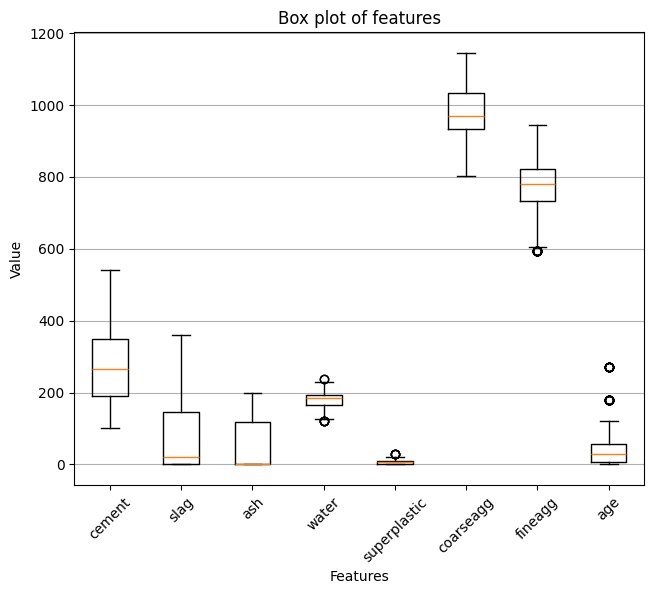

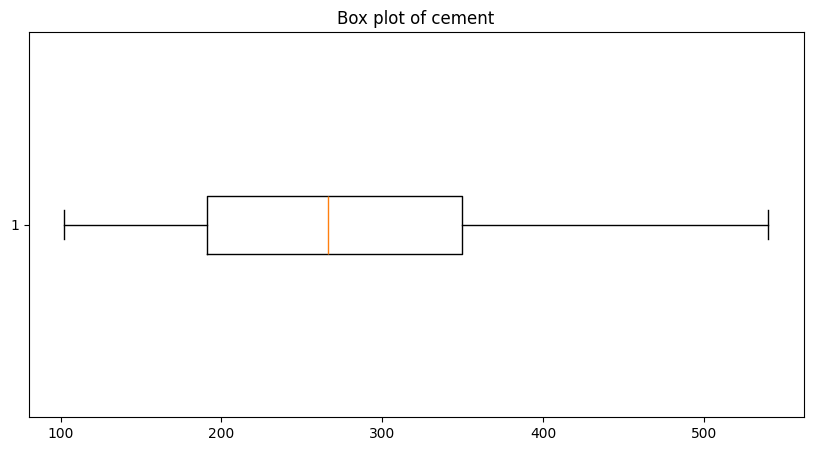

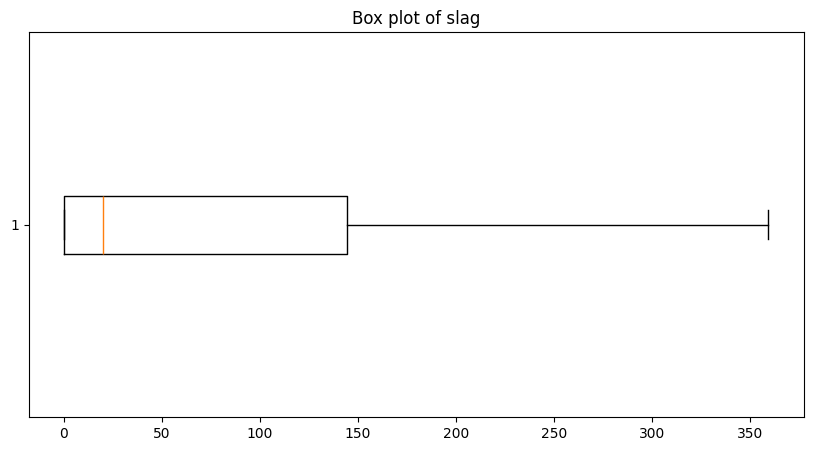

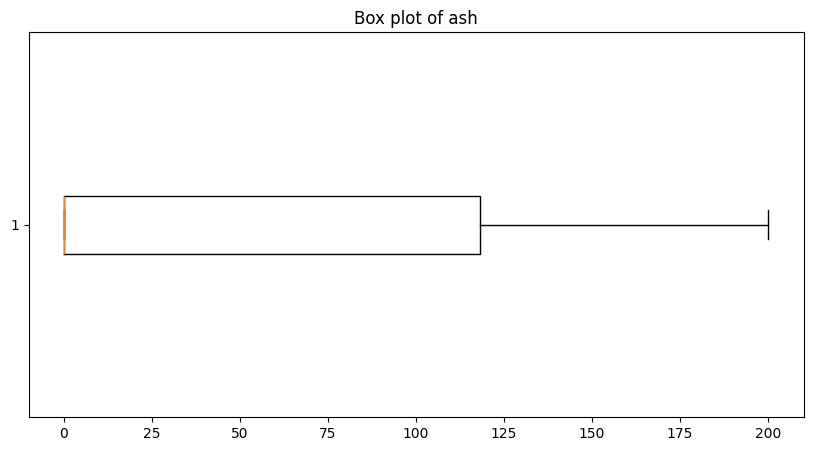

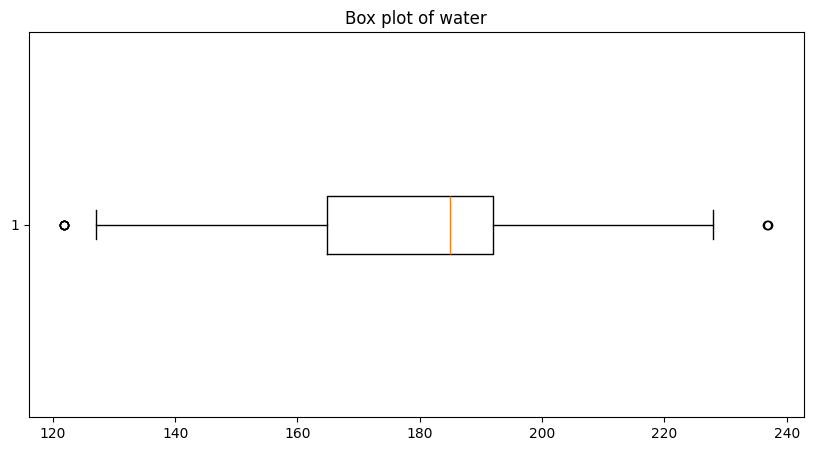

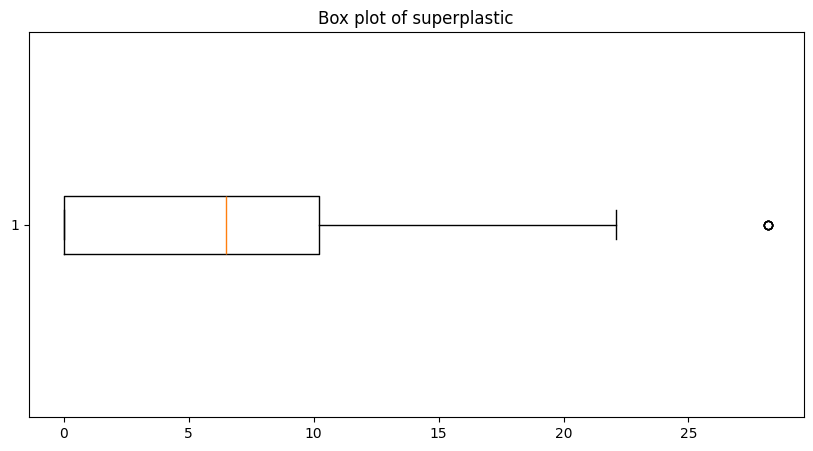

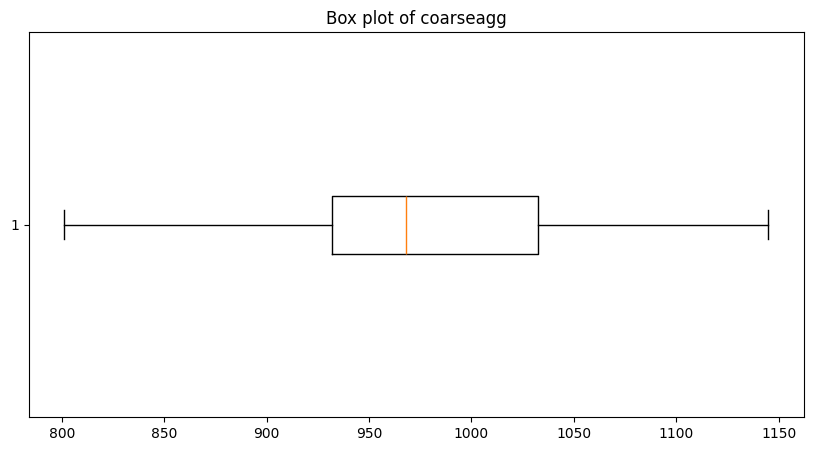

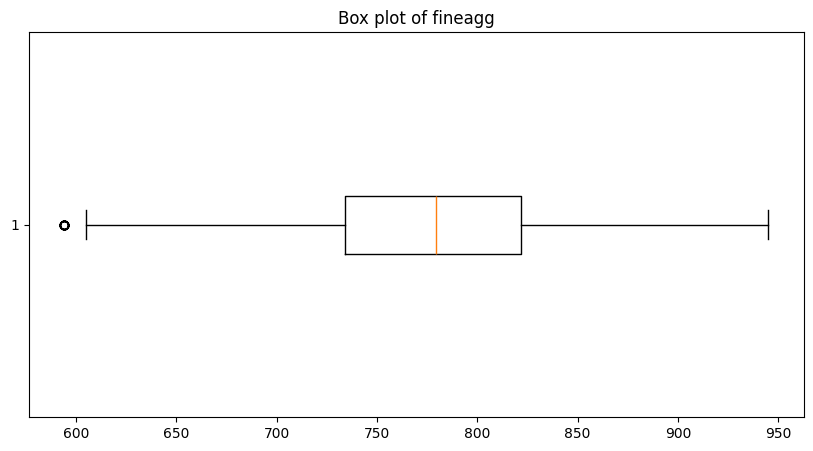

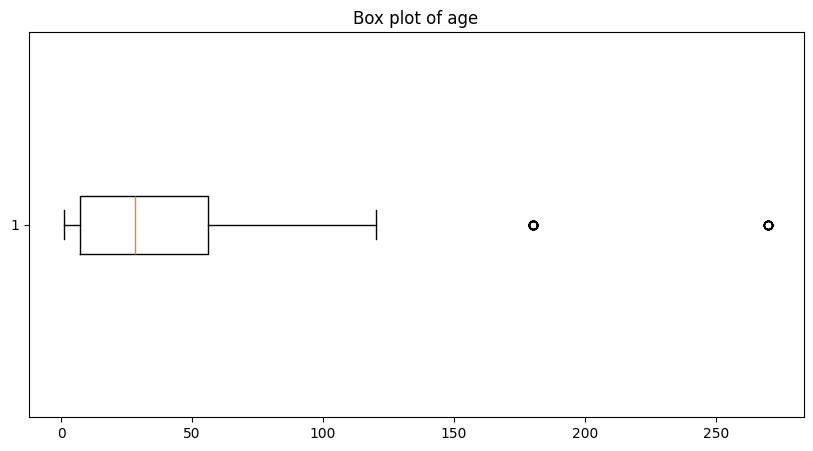

In [4]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 3, 1)
plt.title('Box plot of features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.boxplot([df[feature] for feature in features], labels=features, showfliers=True)
plt.show()

for feature in features:
	plt.figure(figsize=(10, 5))
	plt.boxplot(df[feature], showfliers=True, vert=False)
	plt.title(f'Box plot of {feature}')
	plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

highly_skewed_features = df[features].skew()[abs(df[features].skew()) > 0.5].index

for feature in highly_skewed_features:
    df[feature] = log1p(df[feature])

In [51]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)
training_r2 = LR.score(x_train, y_train) * 100
testing_r2 = LR.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

XGB = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, gamma=0.1, subsample=0.04, colsample_bytree=0.8)
XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)
y_train_pred = XGB.predict(x_train)
training_r2 = XGB.score(x_train, y_train) * 100
testing_r2 = XGB.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

66.71634693964575 67.34761371120138 0.6312667715556302 0.36873322844436984
88.72340490927265 88.24111542963267 0.4822894796399737 0.5177105203600263


In [65]:
DTR = DecisionTreeRegressor(min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=20)
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)
y_train_pred = DTR.predict(x_train)

training_r2 = DTR.score(x_train, y_train) * 100
testing_r2 = DTR.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

XGB = XGBRegressor(n_estimators=793, learning_rate=0.01, max_depth=6, gamma=0.15, subsample=0.045, colsample_bytree=0.8)
XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)
y_train_pred = XGB.predict(x_train)
training_r2 = XGB.score(x_train, y_train) * 100
testing_r2 = XGB.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

79.95035941752461 74.68248916778175 5.267870249742856 -4.267870249742856
90.8564726518867 89.91488383640534 0.9415888154813672 0.05841118451863281


In [90]:
RFR = RandomForestRegressor(n_estimators=920, min_samples_split=3, min_samples_leaf=2, max_features=0.5, bootstrap=True)
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)
y_train_pred = RFR.predict(x_train)

training_r2 = RFR.score(x_train, y_train) * 100
testing_r2 = RFR.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

XGB = XGBRegressor(n_estimators=354, learning_rate=0.0099, max_depth=6, gamma=0.15, subsample=0.045, colsample_bytree=0.8)
XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)
y_train_pred = XGB.predict(x_train)
training_r2 = XGB.score(x_train, y_train) * 100
testing_r2 = XGB.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

96.5298950350444 91.9751750920069 4.554719943037512 -3.5547199430375116
82.9770375400866 82.65115829891805 0.3258792411685505 0.6741207588314495


```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1200],# Number of trees
    'max_depth': [None, 5, 10, 15],# Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],# Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 20], # Minimum number of samples required at a leaf node
    'min_impurity_decrease': [0.0, 0.05, 0.1], # Minimum impurity decrease for a split
    'max_features': ['sqrt', 'log2', 0.6, 0.8], # Number of features to consider at each split
    'bootstrap': [True, False]# Whether to use bootstrap samples
}

RFR = RandomForestRegressor(oob_score=True, random_state=42) # Added random_state for reproducibility
grid_search = GridSearchCV(
    estimator=RFR,
    param_grid=param_grid,
    cv=3,# Number of cross-validation folds
    scoring='r2',# Metric to optimize (R-squared)
    n_jobs=-1,# Use all available cores
    verbose=2
)# Display progress

grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)
best_rfr = grid_search.best_estimator_
y_pred_tuned = best_rfr.predict(x_test)
y_train_pred_tuned = best_rfr.predict(x_train)
training_r2_tuned = best_rfr.score(x_train, y_train) * 100
testing_r2_tuned = best_rfr.score(x_test, y_test) * 100
diff_tuned = abs(training_r2_tuned - testing_r2_tuned)
print("Tuned Training R2:", training_r2_tuned)
print("Tuned Testing R2:", testing_r2_tuned)
print("Tuned Difference:", diff_tuned)
print("Tuned (1 - Difference):", 1 - diff_tuned)
```
# OUTPUT:
Fitting 3 folds for each of 7680 candidates, totalling 23040 fits

e:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
11520 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11520 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
e:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.84728255 0.85030631 0.85021671 ...        nan        nan        nan]

Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best R-squared score: 0.86545690159861
Tuned Training R2: 98.22626431289588
Tuned Testing R2: 93.0819510242481
Tuned Difference: 5.14431328864778
Tuned (1 - Difference): -4.14431328864778

In [120]:
SVM = SVR(C=410, gamma=0.01, epsilon=0.06)
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
y_train_pred = SVM.predict(x_train)

training_r2 = SVM.score(x_train, y_train) * 100
testing_r2 = SVM.score(x_test, y_test) * 100
diff = abs(training_r2 - testing_r2)
print(training_r2, testing_r2, diff, 1-diff)

83.41475696992802 83.40694003768317 0.00781693224485025 0.9921830677551498
